In [2]:
import pandas as pd
import seaborn as sns
import numpy as np

In [3]:
DATA_FILEPATH="../input/train.csv"

In [4]:
df=pd.read_csv(DATA_FILEPATH)

In [5]:
# Taking a look at the data
df.head(10)

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0.0,0.0,0.0,F,N,Red,Trapezoid,Hamster,Russia,...,02e7c8990,3.0,Contributor,Hot,c,U,Pw,6.0,3.0,0
1,1,1.0,1.0,0.0,F,Y,Red,Star,Axolotl,NaN,...,f37df64af,3.0,Grandmaster,Warm,e,X,pE,7.0,7.0,0
2,2,0.0,1.0,0.0,F,N,Red,NaN,Hamster,Canada,...,NaN,3.0,NaN,Freezing,n,P,eN,5.0,9.0,0
3,3,NaN,0.0,0.0,F,N,Red,Circle,Hamster,Finland,...,f9d456e57,1.0,Novice,Lava Hot,a,C,NaN,3.0,3.0,0
4,4,0.0,NaN,0.0,T,N,Red,Triangle,Hamster,Costa Rica,...,c5361037c,3.0,Grandmaster,Cold,h,C,OZ,5.0,12.0,0
5,5,0.0,NaN,1.0,T,N,Red,Triangle,Lion,China,...,05afc0f8b,2.0,Expert,Hot,b,Q,wa,3.0,4.0,0
6,6,0.0,0.0,0.0,F,N,Red,Triangle,Hamster,Costa Rica,...,4d3766412,1.0,Grandmaster,Cold,c,R,rg,5.0,6.0,0
7,7,0.0,0.0,1.0,T,N,Red,Triangle,Axolotl,Finland,...,a651dec43,3.0,Expert,Cold,b,Y,PS,1.0,1.0,0
8,8,0.0,0.0,0.0,F,N,Blue,Polygon,Hamster,Russia,...,NaN,1.0,Novice,Boiling Hot,c,N,mX,6.0,3.0,0
9,9,0.0,0.0,NaN,F,Y,Red,Polygon,Hamster,Finland,...,79b29d54c,3.0,Contributor,Lava Hot,n,I,OZ,1.0,8.0,1


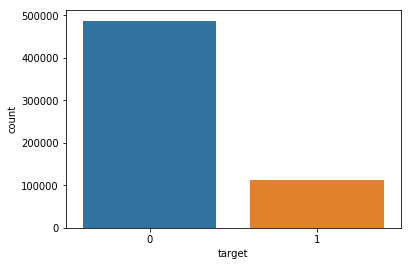

In [7]:
# What is distribution of target?
sns.countplot(data=df, x='target')

Skewed distribution, so we use Area under ROC as metric

We have
- Ordinal 
- Nominal
- Cyclical 
- Binary

categorical data types

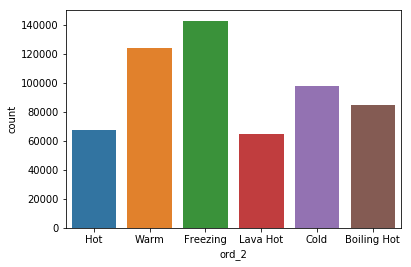

In [8]:
sns.countplot(data=df,x='ord_2')

In [10]:
# We need to map this ordinal categorical data to numerical data
ord_2_mapping = {
    'Freezing': 0,
    'Cold': 1,
    'Warm': 2,
    'Hot': 3,
    'Boiling Hot': 4,
    'Lava Hot': 5
}
df.loc[:, 'ord_2'] = df.ord_2.map(ord_2_mapping)

In [19]:
df.ord_2.value_counts()

0.0    142726
2.0    124239
1.0     97822
4.0     84790
3.0     67508
5.0     64840
Name: ord_2, dtype: int64

In [20]:
# Byte size for sparse array
example = np.array(
    [
        [0, 0, 1],
        [1, 0, 0],  
        [1, 0, 1]
    ]
) 

example.nbytes



72

In [21]:
from scipy import sparse

sparse_example = sparse.csr_matrix(example)
sparse_example.data.nbytes

32

In [22]:
# One feature can be the counts
df.groupby(['ord_2'])['id'].transform('count')

0          67508.0
1         124239.0
2         142726.0
3          64840.0
4          97822.0
            ...   
599995    142726.0
599996     84790.0
599997    142726.0
599998    124239.0
599999     84790.0
Name: id, Length: 600000, dtype: float64

In [23]:
# Can create new features by grouping two categorical variables together
df["new_feature"] = (
    df.ord_1.astype(str) + '_' + df.ord_2.astype(str)
)

In [24]:
df.new_feature.head(10)

0    Contributor_3.0
1    Grandmaster_2.0
2            nan_0.0
3         Novice_5.0
4    Grandmaster_1.0
5         Expert_3.0
6    Grandmaster_1.0
7         Expert_1.0
8         Novice_4.0
9    Contributor_5.0
Name: new_feature, dtype: object

In [25]:
# Handle NANs
df.ord_2.fillna("NONE").value_counts()

0.0     142726
2.0     124239
1.0      97822
4.0      84790
3.0      67508
5.0      64840
NONE     18075
Name: ord_2, dtype: int64